In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "D:\PYTHON DATA SETS"

D:\PYTHON DATA SETS


In [3]:
bicycledf=pd.read_csv("day.csv")

In [4]:
bicycledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# describe(),skew(),kurt() - "cnt","windspeed"
# Histogram, Boxplot, Density Curve - "cnt","windspeed"
# value_counts() - "season","weathersit"

In [6]:
bicycledf[['cnt','windspeed']].describe()

,cnt,windspeed
count,731.000000,731.000000
mean,4504.348837,0.190486
std,1937.211452,0.077498
min,22.000000,0.022392
25%,3152.000000,0.134950
50%,4548.000000,0.180975
75%,5956.000000,0.233214
max,8714.000000,0.507463


In [7]:
bicycledf[['cnt','windspeed']].skew()

cnt         -0.047353
windspeed    0.677345
dtype: float64

In [8]:
bicycledf[['cnt','windspeed']].kurt()

cnt         -0.811922
windspeed    0.410922
dtype: float64

<Axes: ylabel='Frequency'>

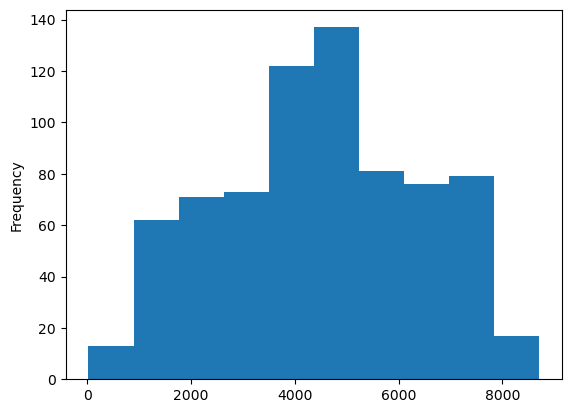

In [9]:
bicycledf.cnt.plot(kind='hist')

<Axes: >

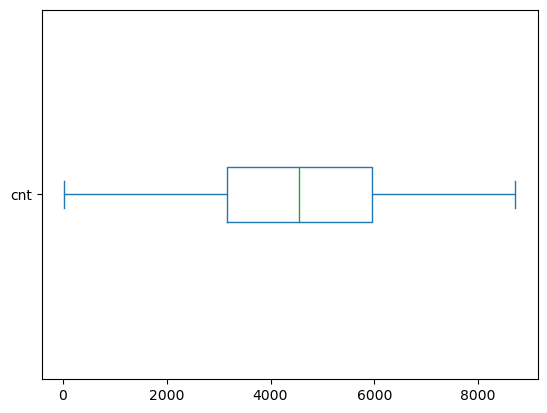

In [10]:
bicycledf.cnt.plot(kind='box',vert=False)

<Axes: ylabel='Density'>

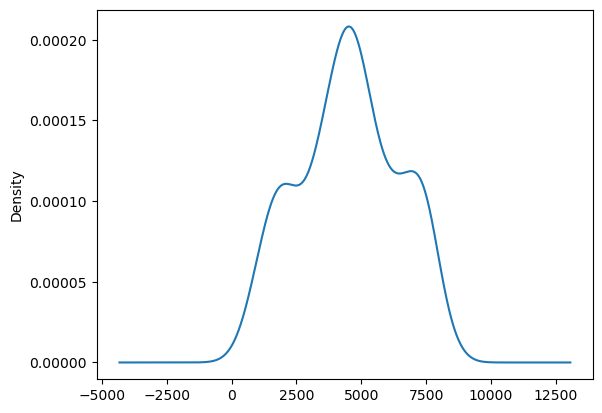

In [11]:
bicycledf.cnt.plot(kind='density')

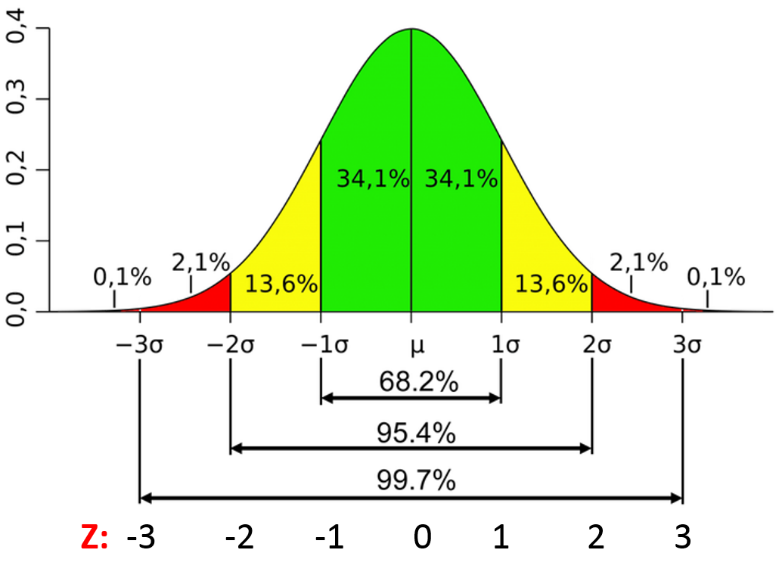

<Axes: ylabel='Frequency'>

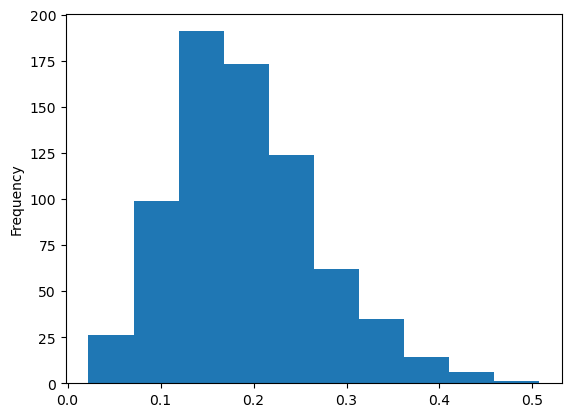

In [12]:
bicycledf.windspeed.plot(kind='hist')

<Axes: >

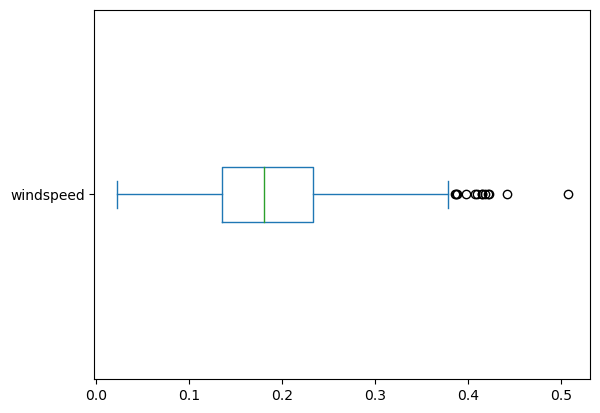

In [13]:
bicycledf.windspeed.plot(kind='box',vert=False)

<Axes: ylabel='Density'>

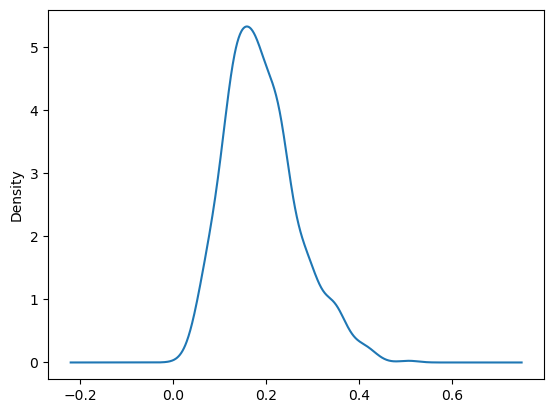

In [14]:
bicycledf.windspeed.plot(kind='density')

In [15]:
# Non Numeric 
bicycledf.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [16]:
bicycledf.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [17]:
# Cross Tabulation - Frequency Count of 2 or more Non Numeric categrocial
# variables. pd.crosstab()
# Season wise Weathersit
pd.crosstab(bicycledf.season,bicycledf.weathersit)

weathersit,1,2,3
season,,,
1,111,66,4
2,113,68,3
3,136,48,4
4,103,65,10


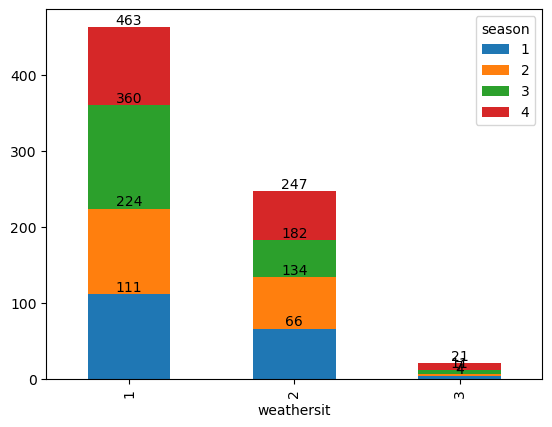

In [18]:
# Cross Tabulation - Stacked Bar Plots
ax=pd.crosstab(bicycledf.weathersit,bicycledf.season).plot(
    kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [19]:
# How many weekdays are holidays?
pd.crosstab(bicycledf.holiday,bicycledf.weekday)

weekday,0,1,2,3,4,5,6
holiday,,,,,,,
0,105,90,103,103,102,102,105
1,0,15,1,1,2,2,0


In [20]:
# Data Aggregation - groupby()
# What is the Average cnt for holiday 0/1? 
bicycledf.cnt.groupby(bicycledf.holiday).mean() 

holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64

In [21]:
# What is the Median windspeed for different weathersit?
bicycledf.windspeed.groupby(bicycledf.weathersit).median()

weathersit
1    0.178496
2    0.179725
3    0.248150
Name: windspeed, dtype: float64

In [22]:
# What is the Average temp of different seasons?
bicycledf.temp.groupby(bicycledf.season).mean()

season
1    0.297748
2    0.544405
3    0.706309
4    0.422906
Name: temp, dtype: float64

In [23]:
# What is the Median humidity for different seasons?
bicycledf.hum.groupby(bicycledf.season).median()

season
1    0.544167
2    0.644375
3    0.635000
4    0.661042
Name: hum, dtype: float64

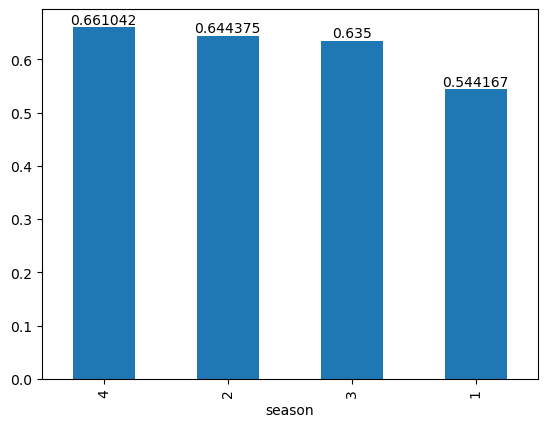

In [24]:
ax=bicycledf.hum.groupby(
    bicycledf.season).median().sort_values(
    ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [25]:
import seaborn as sns

C:\Users\V APARNA\AppData\Local\Temp\ipykernel_20476\1456371813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bicycledf.cnt)


<Axes: xlabel='cnt', ylabel='Density'>

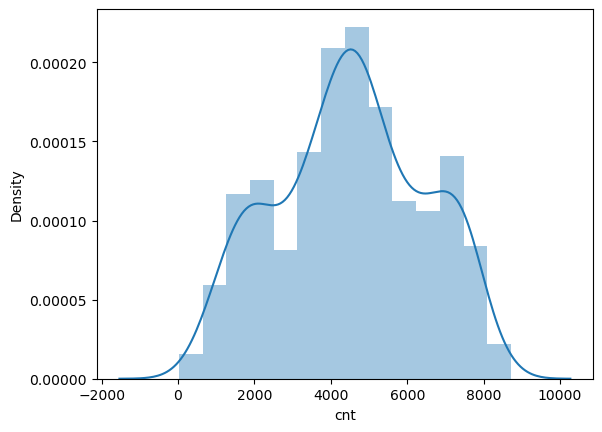

In [26]:
sns.distplot(bicycledf.cnt)

<Axes: >

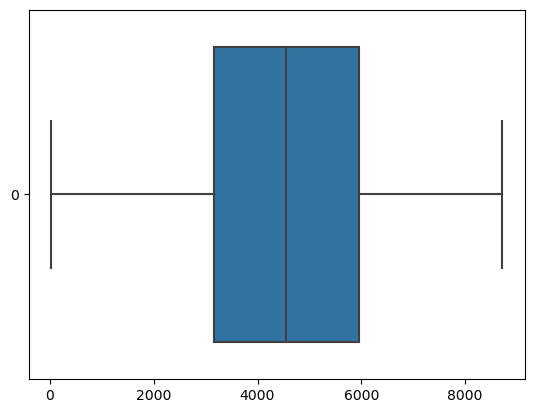

In [27]:
sns.boxplot(bicycledf.cnt,orient='h')

<Figure size 3000x1500 with 0 Axes>

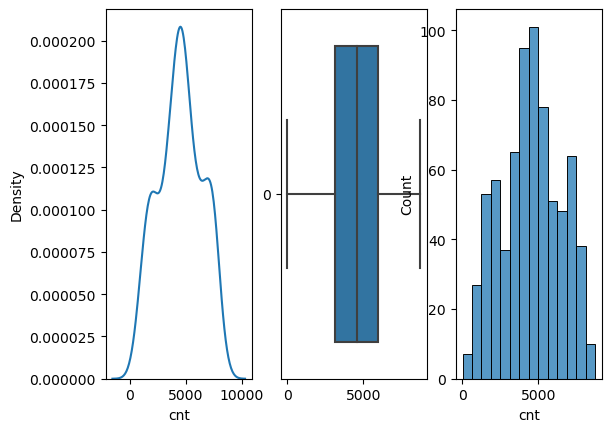

In [28]:
plt.figure(figsize=(30,15))
fig, ax = plt.subplots(1, 3)
sns.kdeplot(bicycledf.cnt,ax=ax[0])# Kernel Density Plot
sns.boxplot(bicycledf.cnt,ax=ax[1],orient='h')
sns.histplot(bicycledf.cnt,ax=ax[2])
plt.show()

In [29]:
# Descriptive Statistcs - Bivariate Statistics - 2 variable Statistics
# Measures of Relationship - Covariance and Correlation
# Covariance points to directionality of movement of 2 variables
# Positive Covariance - Both Variables moving in same direction
# Negative Covariance - Both Variables moving in Opposite direction

# Correlation quantifies the relationship between 2 variables in numerical
# terms. Correlation lies between -1 to 1.

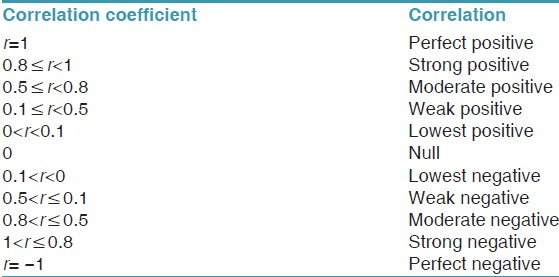

In [30]:
# Bivarite Plot - Scatter Plot

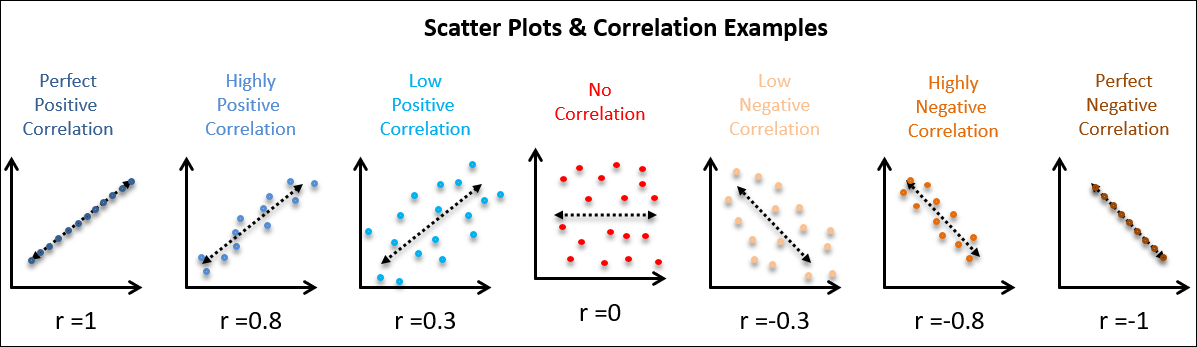

In [31]:
bicycledf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [32]:
numvars=bicycledf[['temp', 'atemp', 'hum', 'windspeed','casual', 
                   'registered', 'cnt']]

In [33]:
numvars.cov() # Covariance

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,0.033508,0.029583,0.003310,-0.002241,68.283781,1.542309e+02,2.225147e+02
atemp,0.029583,0.026556,0.003249,-0.002319,60.854436,1.383669e+02,1.992213e+02
hum,0.003310,0.003249,0.020286,-0.002743,-7.530987,-2.024225e+01,-2.777323e+01
windspeed,-0.002241,-0.002319,-0.002743,0.006006,-8.919005,-2.629318e+01,-3.521218e+01
casual,68.283781,60.854436,-7.530987,-8.919005,471450.441418,4.234689e+05,8.949193e+05
registered,154.230919,138.366859,-20.242247,-26.293180,423468.902417,2.434400e+06,2.857869e+06
cnt,222.514700,199.221295,-27.773235,-35.212185,894919.343836,2.857869e+06,3.752788e+06


In [34]:
numvars.corr() # Correlation

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


<Axes: >

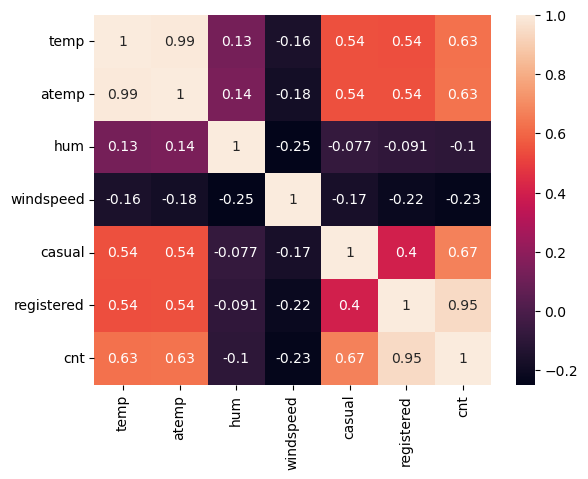

In [35]:
sns.heatmap(numvars.corr(),annot=True)

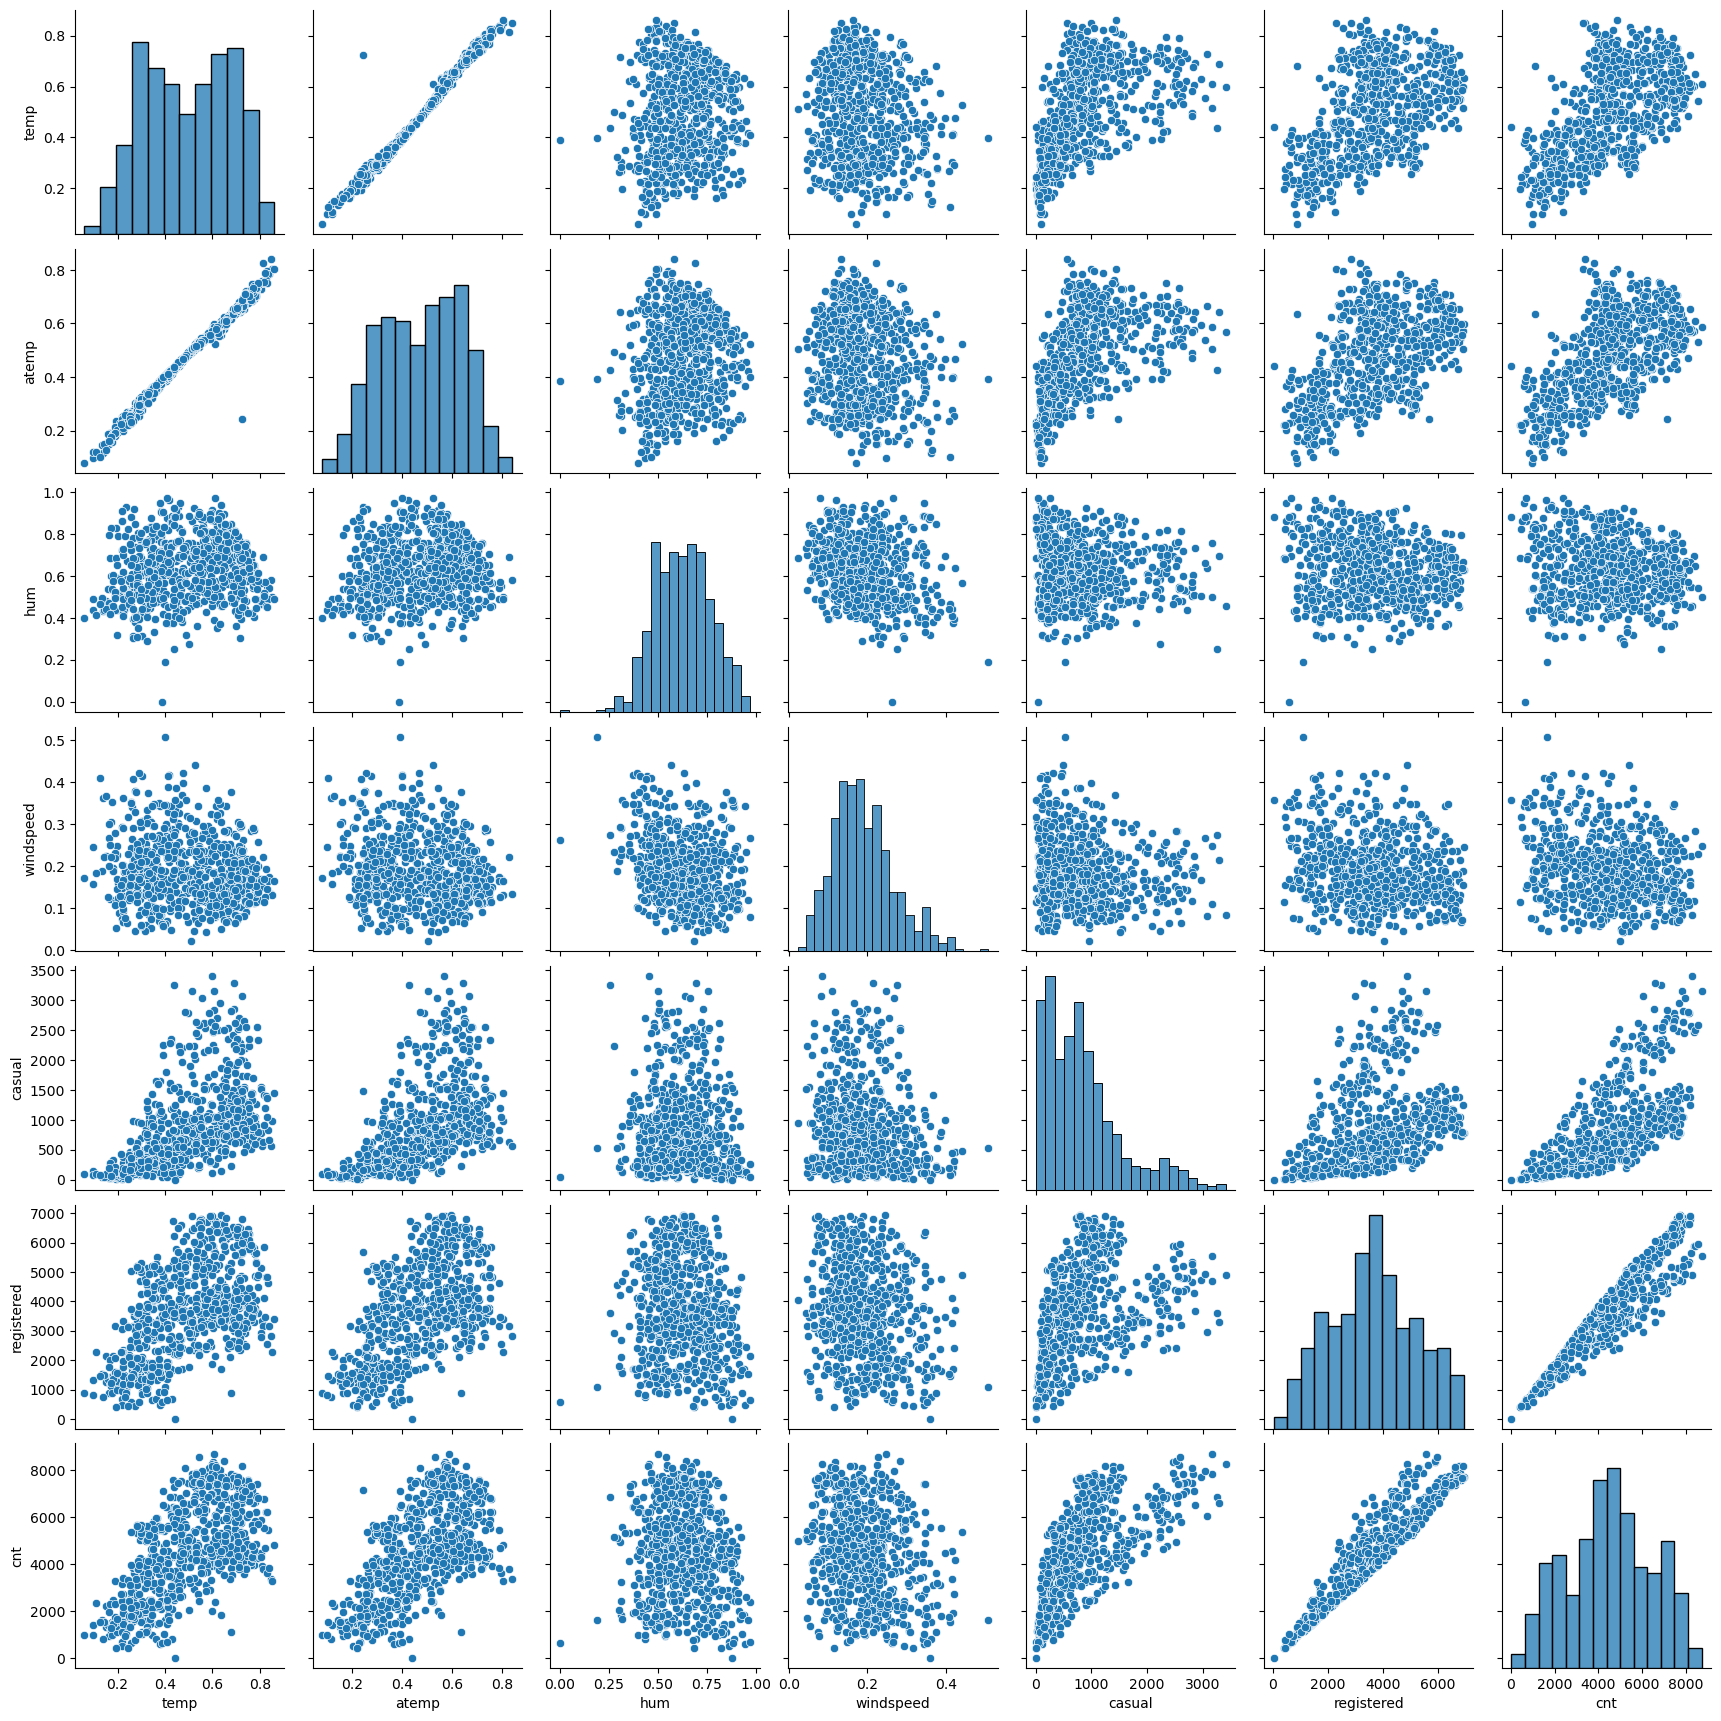

In [36]:
sns.pairplot(numvars)

In [37]:
# Exploratory Data Analysis (EDA) for understanding data
# 1) Descriptive Statistics - Univariate Stats & Bivariate Stats
# 2) Data Vizualization - Plots & Charts. Histogram,Boxplot,Density Curve
# 3) Data Aggregation/Grouping - groupby()

# Inferential Statistics - Hypothesis Testing - Comparision of Means or
# Averages of Groups/levels/Classes
# Fundamental Assumption of Hypothesis testing is Means or Averages of
# Groups/Classes/levels must be different. groupby()
# Fundamental Assumption is Numerical Continuous variable must be closer
# to normal distribution

# Procedure for conducting Hypothesis Testing is
# a) groupby() - numeric variable & Categorical variables or 
# crosstab() - Both Variable are non numeric and categorical

# b) groupby() will confirm mean difference and also identify the number
# of Levels/Groups/Classes in Categorical Variable

# c) Identify the Hypothesis Test to be conducted
# One variable Numeric and Other Variable Categorical with exactly
# 2 Levels/Groups/Classes - 2 Sample Independent T test

# One variable Numeric and Other Variable Categorical with more than
# 2 Levels/Groups/Classes - Anova Single Factor or Oneway Anova

# Both Variables are Categorical and Non Numeric - Chisquare Test of
# Independence

# d) Frame Null Hypothesis and Alternate Hypothesis.

# e) Split data according to Groups/Levels/Classes

# f) Conduct the relevant hypothesis test

# g) Interpretation of output
# p-value or probabiliy value is less than 0.05, REJECT NULL HYPOTHESIS
# p-value or probabiliy value is greater tahn 0.05, FAIL TO REJECT NULL(
# ACCEPT NULL)

# 0.05 means 5% Alpha or probable error rate and 95% Confidence Level
# Other p-vaules like 0.01 or 0.001 used in Pharma & Clinical Trials

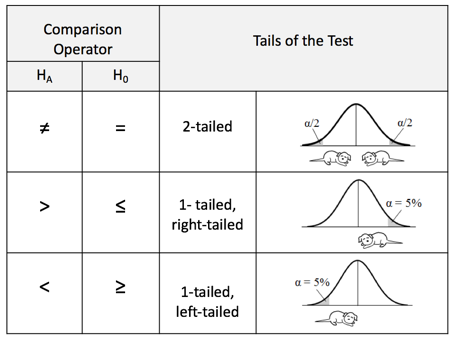

In [38]:
# Test Null Average cnt of bicycles on holiday 0/1 equal.
# groupby()
bicycledf.cnt.groupby(bicycledf.holiday).mean() # Means are different
# Exactly 2 Classes/Levels/groups - 2 Sample Independent T test

holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64

In [39]:
# 2 Types of 2 Sample Independent T test - groupby() - var()
# 2 Sample Independent T test assuming Unequal Variances
# 2 Sample Independent T test assuming equal Variances

In [40]:
bicycledf.cnt.groupby(bicycledf.holiday).var() 

holiday
0    3.721095e+06
1    4.424084e+06
Name: cnt, dtype: float64

In [41]:
# Frame Null & Alternate Hypothesis
# Null _ There is no significant difference in Average cnt of holiday 0/1.
# Treat Both Means or Averages as equal. (Ignore the difference)

# Alt _ There is significant difference in Average cnt of holiday 0/1.
# Treat Both Means or Averages as not equal. (Cannot Ignore difference)

# IS THE DIFFERENCE IN MEANS OR AVERAGES OF GROUPS/LEVELS/CLASSES IS
# STATISTICALLY SIGNIFICANT OR NOT

In [42]:
# SPLIT DATA
holidayyes=bicycledf[bicycledf.holiday==1]
holidayno=bicycledf[bicycledf.holiday==0]

In [43]:
from scipy.stats import ttest_ind

In [44]:
ttest_ind(holidayyes.cnt,holidayno.cnt,equal_var=False)
# Since pvalue=0.10299984047957059 is greater than 0.05, Fail to Reject
# Null. Difference in means is NOT STATISTICALLY SIGNIFICANT

# Reject Null - Significant
# Fail to Reject Null - Not Significant

Ttest_indResult(statistic=-1.704685615800036, pvalue=0.10299984047957059)

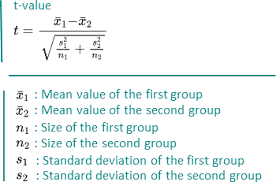

In [45]:
print(holidayno.shape) # N= 710
print(holidayyes.shape)# N=21

(710, 16)
(21, 16)


In [46]:
(4527.10-3735.00)/(np.sqrt((3.721095e+06/710)+(4.424084e+06/21)))

1.7046765213577122

In [47]:
bicycledf.windspeed.groupby(bicycledf.holiday).mean()

holiday
0    0.190402
1    0.193319
Name: windspeed, dtype: float64

In [48]:
bicycledf.windspeed.groupby(bicycledf.holiday).var()

holiday
0    0.006005
1    0.006346
Name: windspeed, dtype: float64

In [49]:
# Null _ No Significant difference in Average windspeed of holiday 0/1
# Alt _ Significant difference in Average windspeed of holiday 0/1

In [50]:
ttest_ind(holidayno.windspeed,holidayyes.windspeed,equal_var=False)

Ttest_indResult(statistic=-0.16550270230269873, pvalue=0.8701212295765679)

In [51]:
bicycledf.cnt.groupby(bicycledf.workingday).mean()

workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

In [52]:
bicycledf.cnt.groupby(bicycledf.workingday).var()

workingday
0    4.211284e+06
1    3.528445e+06
Name: cnt, dtype: float64

In [53]:
workingdayyes=bicycledf[bicycledf.workingday==1]
workingdayno=bicycledf[bicycledf.workingday==0]

In [54]:
# Null _ No Significant difference in Average cnt of workingday 0/1
# Alt _ Significant difference in Average cnt of workingday 0/1

In [55]:
ttest_ind(workingdayno.cnt,workingdayyes.cnt,equal_var=False)

Ttest_indResult(statistic=-1.6013720686967898, pvalue=0.11005737827017054)

In [56]:
# If there are more than 2 Levels/Classes/Groups in Categorical variable
# Anova Single Factor or Oneway Anova is used.

# groupby() - mean()
# Split data into as many Levels/Classes/Groups
# Frame Null & Alternate Hypothesis
# Conduct Test & infer based on p-value

In [57]:
# Test Null Average cnt of different seasons equal
bicycledf.cnt.groupby(bicycledf.season).mean()

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [58]:
# Split data 
s1=bicycledf[bicycledf.season==1]
s2=bicycledf[bicycledf.season==2]
s3=bicycledf[bicycledf.season==3]
s4=bicycledf[bicycledf.season==4]

In [59]:
# Null - There is no Significant difference in Average cnt of different
# seasons
# Alt- There is Significant difference in Average cnt of different
# seasons

In [60]:
from scipy.stats import f_oneway

In [61]:
f_oneway(s1.cnt,s2.cnt,s3.cnt,s4.cnt)
# Since pvalue=6.720391362913176e-67 is less than 0.05, Reject Null
# Difference in Means is Statistically Significant

F_onewayResult(statistic=128.76962156570784, pvalue=6.720391362913176e-67)

In [62]:
# Test Null Average cnt for different weathersit is equal
bicycledf.cnt.groupby(bicycledf.weathersit).mean()

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

In [63]:
weathersit1=bicycledf[bicycledf.weathersit==1]
weathersit2=bicycledf[bicycledf.weathersit==2]
weathersit3=bicycledf[bicycledf.weathersit==3]

In [64]:
# Null - No Significant difference in Average cnt of different weathersit
# Alt - Significant difference in Average cnt of different weathersit

In [65]:
f_oneway(weathersit1.cnt,weathersit2.cnt,weathersit3.cnt)

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

In [66]:
# Both variables are Non Numeric and categorical - Chi-Square Test of
# Independence
# Input of ChiSquare Test is cross tabulation

# Null - There is no Association/Relationship between both variables
# Alt - There is Association/Relationship between both variables

In [67]:
# Test Null No Association between weathersit and season
pd.crosstab(bicycledf.weathersit,bicycledf.season)

season,1,2,3,4
weathersit,,,,
1,111,113,136,103
2,66,68,48,65
3,4,3,4,10


In [68]:
from scipy.stats import chi2_contingency

In [69]:
chi2_contingency(pd.crosstab(bicycledf.weathersit,bicycledf.season))
# Since pvalue=0.02117930104473366 is less than 0.05, REJECT NULL

Chi2ContingencyResult(statistic=14.883886189776794, pvalue=0.02117930104473366, dof=6, expected_freq=array([[114.64158687, 116.54172367, 119.0752394 , 112.74145007],
       [ 61.15868673,  62.17236662,  63.52393981,  60.14500684],
       [  5.1997264 ,   5.28590971,   5.40082079,   5.11354309]]))

In [70]:
# Test Null No Association between weathersit and workingday
chi2_contingency(pd.crosstab(bicycledf.weathersit,bicycledf.workingday))
# Since pvalue=0.2537639982644043 is greater than 0.05, Fail to Reject Null

Chi2ContingencyResult(statistic=2.742701169147394, pvalue=0.2537639982644043, dof=2, expected_freq=array([[146.31053352, 316.68946648],
       [ 78.05335157, 168.94664843],
       [  6.63611491,  14.36388509]]))

In [71]:
# Test Null No Association between month and weathersit
chi2_contingency(pd.crosstab(bicycledf.mnth,bicycledf.weathersit))
# Since  pvalue=0.014637111771019196 is less than 0.05, Reject NUll

Chi2ContingencyResult(statistic=38.8612882406188, pvalue=0.014637111771019196, dof=22, expected_freq=array([[39.26949384, 20.9493844 ,  1.78112175],
       [36.10259918, 19.25991792,  1.6374829 ],
       [39.26949384, 20.9493844 ,  1.78112175],
       [38.00273598, 20.27359781,  1.72366621],
       [39.26949384, 20.9493844 ,  1.78112175],
       [38.00273598, 20.27359781,  1.72366621],
       [39.26949384, 20.9493844 ,  1.78112175],
       [39.26949384, 20.9493844 ,  1.78112175],
       [38.00273598, 20.27359781,  1.72366621],
       [39.26949384, 20.9493844 ,  1.78112175],
       [38.00273598, 20.27359781,  1.72366621],
       [39.26949384, 20.9493844 ,  1.78112175]]))

In [72]:
# Paired Sample or Related Sample T test - Before & After
# BP of patient before taking tablet and BP of same patient after taking
# tablet

# Null - There is no significant difference in Average variable before &
# after event
# Alt - There is significant difference in Average variable before &
# after event

In [73]:
# Test Null Average inflation before&after demonitization equal(12 months)
beforedemon=[3.35,4.14,5.30,6.46,6.13,6.59,5.86,5.51,5.53,5.91,6.32,6.72]
afterdemon=[2.59,2.23,1.86,2.62,2.61,2.21,1.09,1.08,1.79,2.52,2.89,3.24]

In [74]:
print("Before Demonitize:",np.mean(beforedemon))
print("After Demonitize:",np.mean(afterdemon))

Before Demonitize: 5.651666666666667
After Demonitize: 2.2274999999999996


In [75]:
# Null - There is no significant difference in Average inflation before &
# after demonitization
# Alt - There is significant difference in Average inflation before &
# after demonitization

In [76]:
from scipy.stats import ttest_rel

In [77]:
ttest_rel(beforedemon,afterdemon)
# Since pvalue=3.600767294619255e-07 is less than 0.05, Reject Null

TtestResult(statistic=10.74164855224715, pvalue=3.600767294619255e-07, df=11)

In [78]:
# Test Null Average inflation before&after GST Implement equal(12 months)
beforegst=[1.08,1.09,2.21,2.61,2.62,1.86,2.23,2.59,3.35,4.14,5.30,6.46]
aftergst=[1.79,2.52,2.89,3.24,3.97,4.00,5.11,4.74,4.36,3.97,3.96,3.93]

In [79]:
print("Before GST Implemet:",np.mean(beforegst))
print("After GST Implemet:",np.mean(aftergst))

Before GST Implemet: 2.9616666666666664
After GST Implemet: 3.706666666666667


In [80]:
ttest_rel(beforegst,aftergst)
# Since pvalue=0.11695042528410868 is greater than 0.05, Fail to Reject Null

TtestResult(statistic=-1.701279692640982, pvalue=0.11695042528410868, df=11)